In [0]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd




In [29]:
datafile = "/content/drive/My Drive/Colab Notebooks/sanjay data/raw_data/mix6ml"

x_data = pd.read_csv(datafile+"X.csv",names=['s1','s2','s3','s4','s5'])
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
#x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=0)
x_train = x_data[:880]
x_test = x_data[880:]
y_train = y_data[:880]
y_test = y_data[880:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((880, 5), (880, 6), (845, 5), (845, 6))

In [30]:
#defifne a sequentail Model
model = Sequential()
#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=5,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train,y_train,epochs=150,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Train on 880 samples, validate on 845 samples
Epoch 1/150
880/880 [==============================] - 1s 1ms/step - loss: 5.5713 - acc: 0.6983 - val_loss: 3.4698 - val_acc: 0.8333
Epoch 2/150
880/880 [==============================] - 0s 142us/step - loss: 3.4225 - acc: 0.8290 - val_loss: 3.3122 - val_acc: 0.8333
Epoch 3/150
880/880 [==============================] - 0s 136us/step - loss: 3.2644 - acc: 0.8303 - val_loss: 3.2358 - val_acc: 0.8333
Epoch 4/150
880/880 [==============================] - 0s 134us/step - loss: 3.1944 - acc: 0.8320 - val_loss: 3.1965 - val_acc: 0.8333
Epoch 5/150
880/880 [==============================] - 0s 137us/step - loss: 3.1419 - acc: 0.8341 - val_loss: 3.1743 - val_acc: 0.8333
Epoch 6/150
880/880 [==============================] - 0s 140us/step - loss: 3.1520 - acc: 0.8326 - val_loss: 3.1577 - val_acc: 0.8333
Epoch 7/150
880/880 [==============================] - 0s 145us/step - loss: 3.1683 - acc: 0.8305 - val_loss: 3.3402 - val_acc: 0.7994
Epoch 8/150

In [4]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 11,306
Trainable params: 11,306
Non-trainable params: 0
_________________________________________________________________


In [31]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))
y_pred = model.predict(x_test)
rounded = [np.argmax(x) for x in y_pred]
y_testComp = [np.argmax(x) for x in y_test]
confusion_matrix(y_testComp,rounded)

Training Accuracy :  0.8619078160686926
Validation Accuracy :  0.8636857187889031


array([[261,   0,   0,   3,   0],
       [  0, 122,   0,   0,   0],
       [  0,   0, 185,   0,   0],
       [  1,   0,   2, 161,   0],
       [ 49,  21,  15,  25,   0]])

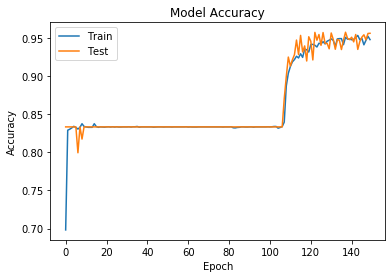

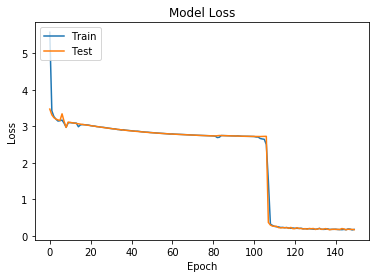

In [33]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [184]:
precision_score(y_testComp,rounded,average=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.96202532, 0.96666667, 0.79844961, 0.53216374, 0.        ])

In [34]:
testfile = "/content/drive/My Drive/Colab Notebooks/sanjay data/raw_data/mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [np.argmax(x) for x in new_predYT]
new_predYComp = [np.argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)

array([[653,   0,   0,   4,   0],
       [  0, 214,   0,   0,   0],
       [  0,   0, 349,   0,   0],
       [  1,   0,   2, 305,   0],
       [ 67,  31,  42,  57,   0]])

In [283]:
datafile = "/content/drive/My Drive/Colab Notebooks/sanjay data/raw_data/mix6ml"

test = np.genfromtxt(datafile+"X.csv",delimiter=',')
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
x_trainT = test[:1000]
x_testT = test[1000:]
y_trainT = y_data[:1000]
y_testT = y_data[1000:]
x_trainT.shape,y_trainT.shape,x_testT.shape,y_testT.shape, test.shape, y_data.shape



((1000, 5), (1000, 6), (725, 5), (725, 6), (1725, 5), (1725, 6))

In [274]:
x_data.shape

(1725, 1, 5)

In [284]:
x_data = test.reshape(test.shape[0],1,5)
x_train = x_trainT.reshape(x_trainT.shape[0],1,5)
x_test = x_testT.reshape(x_testT.shape[0],1,5)
y_train = y_trainT.reshape(y_trainT.shape[0],1,6)
y_test = y_testT.reshape(y_testT.shape[0],1,6)
x_train.shape,y_train.shape,x_test.shape,y_test.shape, test.shape, y_data.shape


((1000, 1, 5), (1000, 1, 6), (725, 1, 5), (725, 1, 6), (1725, 5), (1725, 6))

In [269]:
x_data.shape

(1725, 1, 5)

In [225]:
samples = list()
length = 115
for i in range(0,x_data.shape[0],length):
	# grab from i to i + 200
	sample = x_data[i:i+length]
	samples.append(sample)
print(len(samples))

15


In [286]:
#Hidden Layer-1
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train, y_trainT, epochs=50, batch_size=72, validation_data=(x_test, y_testT), verbose=2, shuffle=False)

Train on 1000 samples, validate on 725 samples
Epoch 1/50
 - 3s - loss: 0.6572 - acc: 0.6797 - val_loss: 0.5927 - val_acc: 0.8333
Epoch 2/50
 - 0s - loss: 0.5508 - acc: 0.8343 - val_loss: 0.5154 - val_acc: 0.8333
Epoch 3/50
 - 0s - loss: 0.4864 - acc: 0.8333 - val_loss: 0.4770 - val_acc: 0.8333
Epoch 4/50
 - 0s - loss: 0.4533 - acc: 0.8333 - val_loss: 0.4541 - val_acc: 0.8333
Epoch 5/50
 - 0s - loss: 0.4328 - acc: 0.8333 - val_loss: 0.4408 - val_acc: 0.8333
Epoch 6/50
 - 0s - loss: 0.4201 - acc: 0.8333 - val_loss: 0.4320 - val_acc: 0.8333
Epoch 7/50
 - 0s - loss: 0.4121 - acc: 0.8333 - val_loss: 0.4266 - val_acc: 0.8333
Epoch 8/50
 - 0s - loss: 0.4061 - acc: 0.8333 - val_loss: 0.4250 - val_acc: 0.8333
Epoch 9/50
 - 0s - loss: 0.4033 - acc: 0.8333 - val_loss: 0.4207 - val_acc: 0.8333
Epoch 10/50
 - 0s - loss: 0.4001 - acc: 0.8333 - val_loss: 0.4191 - val_acc: 0.8333
Epoch 11/50
 - 0s - loss: 0.3972 - acc: 0.8333 - val_loss: 0.4186 - val_acc: 0.8333
Epoch 12/50
 - 0s - loss: 0.3960 - acc

In [0]:
model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_data, y_data, epochs=50, batch_size=72, verbose=2, shuffle=False)

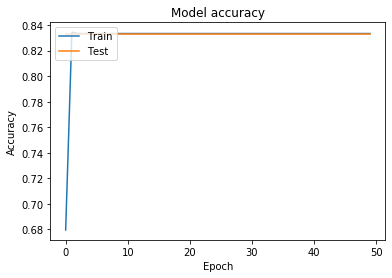

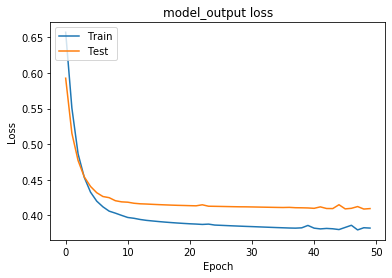

In [290]:
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
new_predYT= model.predict(x_train)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in y_train]


In [303]:
new_predY

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [0]:
testfile = "/content/drive/My Drive/Colab Notebooks/sanjay data/raw_data/mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)